*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links:
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)

## ex. 1

$$  
y = x^Tx:,  \quad x \in \mathbb{R}^N
$$

$$
\frac{dy}{dx} =
$$


$$
Решение:\\Функция: \
y = x^T x, \ x \in \mathbb{R}^N\\
перепишем:\ y = x^T x = \sum_{i=1}^N x_i^2\\
Вычислим\ градиент:\\
Поскольку \ y \ — скалярная\ функция\ вектора \ x , нам\ нужно\ найти\ градиент \ y \ по \ x :\\
\frac{dy}{dx} = \nabla_x y\\
Применим\ правило\ матричной\ дифференциации:\\
Известно, что\ для\ любого\ вектора \ x \ производная \ x^T x \ по \ x \ равна \ 2x\\ Это\ можно\ получить, дифференцируя\ каждый\ элемент \ x_i^2 \ по \ x_i\\
Ответ:\frac{dy}{dx} = 2x.
\
$$ :

In [ ]:
import numpy as np

# Создаем вектор x
x = np.array([1, 2, 3])  # Пример, для трехмерного вектора

# Вычисляем значение функции y = x^T * x
y = np.dot(x, x)

# Вычисляем градиент dy/dx
dy_dx = 2 * x

# Выводим результаты
print("Значение функции y = x^T * x:", y)
print("Градиент dy/dx:", dy_dx)

Значение функции y = x^T * x: 14
Градиент dy/dx: [2 4 6]


## ex. 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$

$$
\frac{dy}{dA} =
$$

$$ Решение:\\
y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} \\
— это\ след\ произведения\ матриц \ A\ и \ B, то\ есть\ сумма\ элементов\ на\ главной\ диагонали\ матрицы\ AB\\
Используем\ правило\ дифференцирования\ для\ следа. \\
Известно, что\ для\ матриц\ A\ и\ B\ верно\ следующее\ правило:\\
\frac{d \operatorname{tr}(AB)}{dA} = B^T\\
Ответ: \frac{dy}{dA} = B^T\
$$

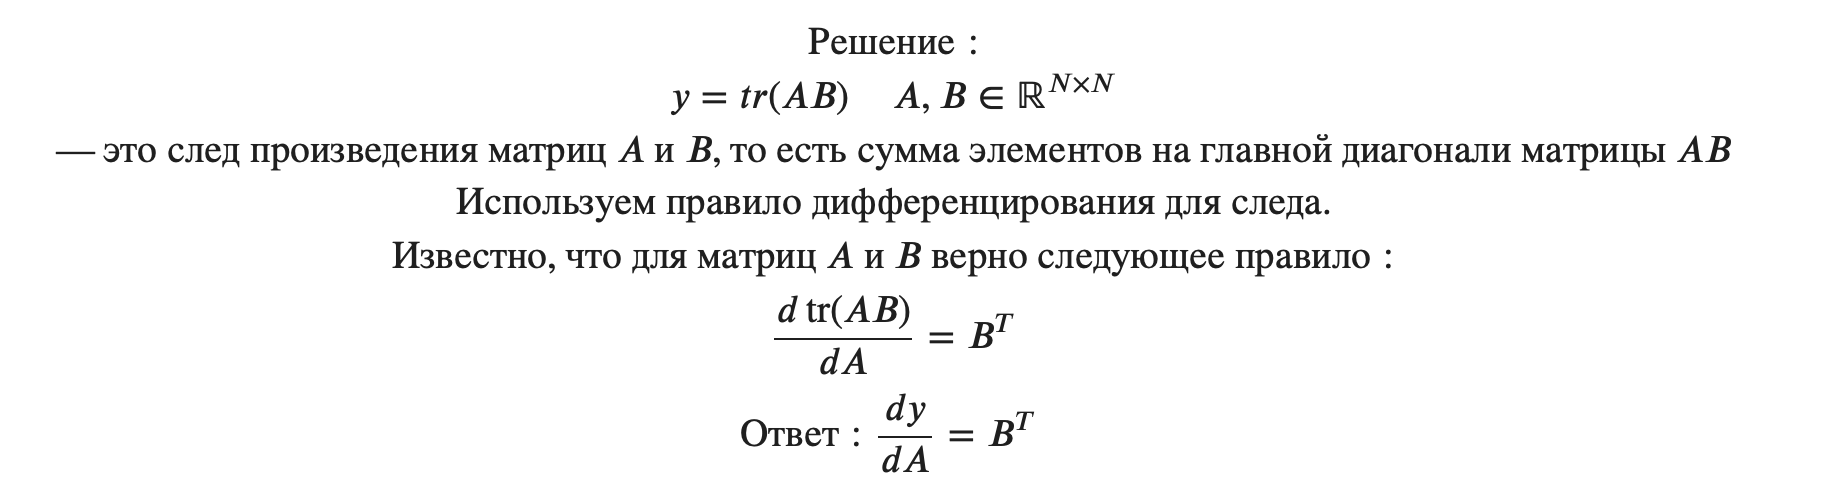

In [ ]:
import numpy as np

# Определяем матрицы A и B
A = np.array([[1, 2],
              [3, 4]])  # Пример 2x2 матрицы A
B = np.array([[5, 6],
              [7, 8]])  # Пример 2x2 матрицы B

# Вычисляем значение функции y = tr(AB)
y = np.trace(np.dot(A, B))

# Вычисляем градиент dy/dA
dy_dA = B.T

# Выводим результаты
print("Значение функции y = tr(AB):", y)
print("Градиент dy/dA (B^T):")
print(dy_dA)

Значение функции y = tr(AB): 69
Градиент dy/dA (B^T):
[[5 7]
 [6 8]]


## ex. 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N}
$$

$$
\frac{dy}{dx} =
$$

$$
\frac{dy}{dA} =
$$

Hint for the latter (one of the ways): use *ex. 2* result and the fact
$$
tr(ABC) = tr (CAB)
$$

$$ Решение:\\
Поскольку\ y\ является\ скалярным\ произведением\ и\ A\ и\ c\ являются\ константами\ относительно\ x, можно\ использовать\ правило\ дифференцирования\ для\ векторов:\\
\frac{dy}{dx} = A c\\
Для\ нахождения\ производной\  \frac{dy}{dA}\  можно\ воспользоваться\ результатом\ из\ упражнения\ 2\ и\ свойством\ следа:\\
y = \operatorname{tr}(x^T A c) = \operatorname{tr}(A c x^T)\\
\frac{dy}{dA} = c x^T\\
Ответ: \frac{dy}{dx} = A c\\
\frac{dy}{dA} = c x^T\\
$$

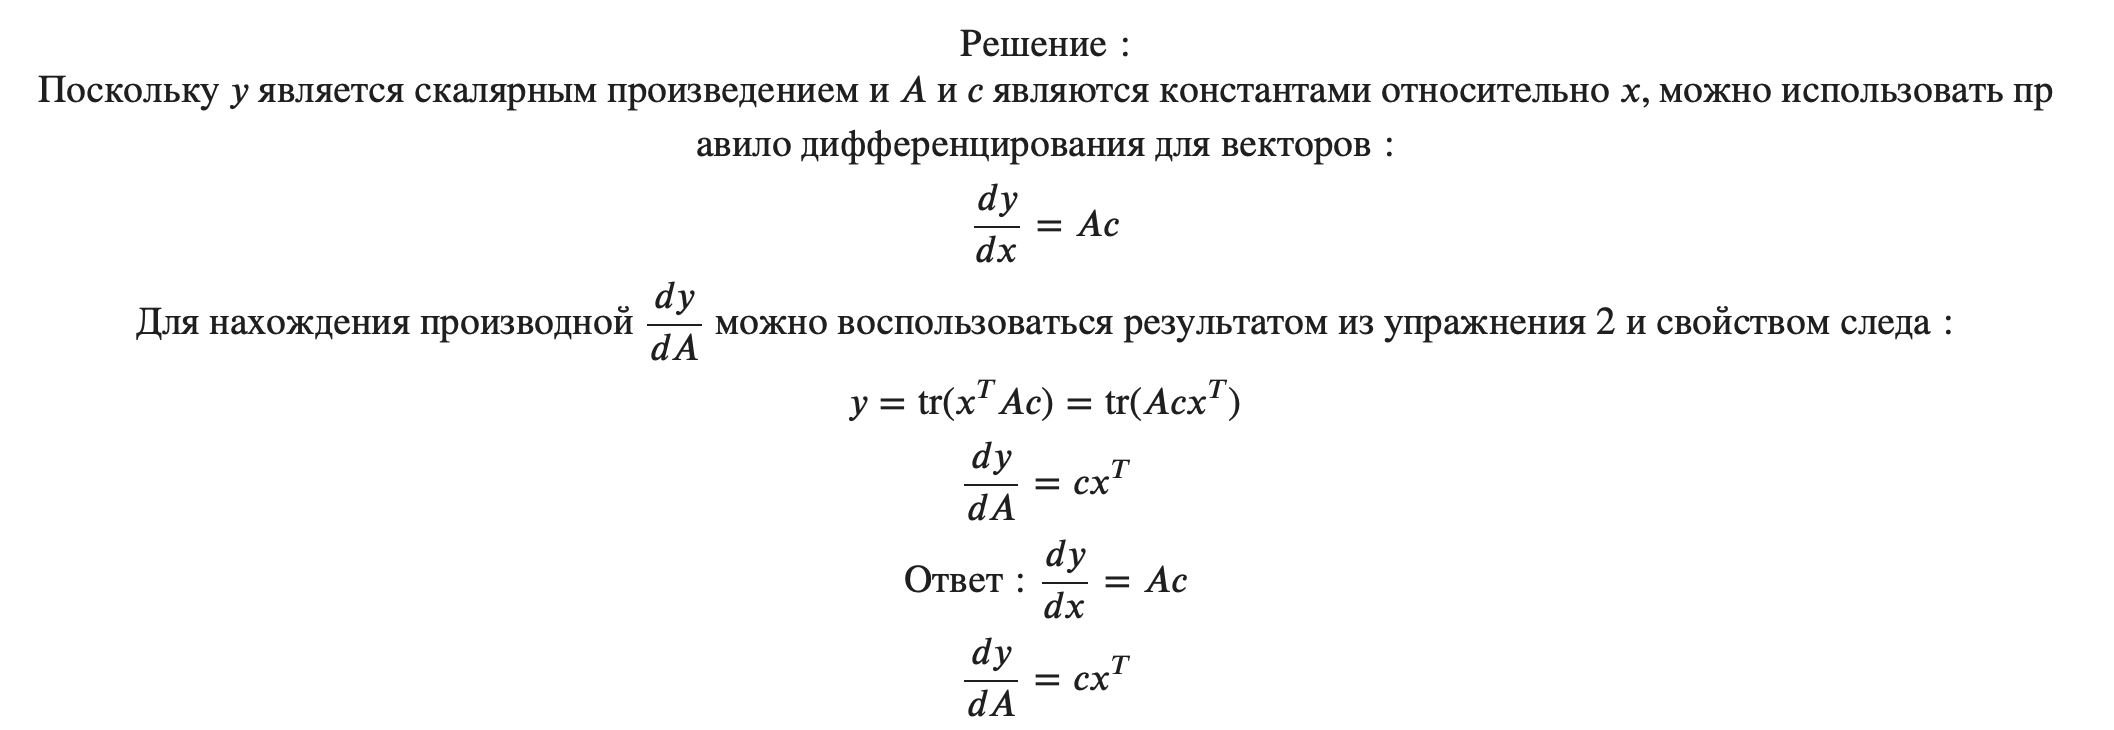

In [1]:
import numpy as np

# Задаем матрицу A, вектор x и вектор c
A = np.array([[1, 2],
              [3, 4]])  # Пример матрицы 2x2
x = np.array([1, 2])     # Пример вектора размерности 2
c = np.array([3, 4])     # Пример вектора размерности 2

# Вычисление функции y = x^T A c
y = np.dot(x.T, np.dot(A, c))

# Вычисляем производную dy/dx
dy_dx = np.dot(A, c)

# Вычисляем производную dy/dA
dy_dA = np.outer(c, x)  # Результат c x^T

# Выводим результаты
print("Значение функции y = x^T A c:", y)
print("Производная dy/dx:", dy_dx)
print("Производная dy/dA:")
print(dy_dA)

Значение функции y = x^T A c: 61
Производная dy/dx: [11 25]
Производная dy/dA:
[[3 6]
 [4 8]]


## ex. 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ?
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T)
$$
it is easy to derive gradients (you can find it in one of the refs).

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="https://github.com/girafe-ai/ml-course/blob/23f_basic/homeworks/lab01_ml_pipeline/grad.png?raw=1">
(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule!
let $ F = AS $

**Find**
$$
\frac{dJ}{dF} =  
$$
and
$$
\frac{dF}{dS} =  
$$
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  
$$

$$
Решение:\\
Разложим\ функцию\ потерь:\\
Фробениусова\ норма\ квадрата\ ошибки\ может\ быть\ выражена\ через\ след:\\
J = \|X - AS\|_F^2 = \operatorname{tr}((X - AS)(X - AS)^T)\\
Раскроем\ скобки:\\
(X - AS)(X - AS)^T = XX^T - X S^T A^T - A S X^T + A S S^T A^T\\
Используя\ линейность\ следа:\\
J = \operatorname{tr}(XX^T) - 2\operatorname{tr}(ASX^T) + \operatorname{tr}(ASS^TA^T)\\
Теперь\ будем\ находить\ градиент\ \frac{\partial J}{\partial S}. Учитывая, что\ A\ и\ X\ фиксированы:\\
\frac{\partial}{\partial S} \operatorname{tr}(XX^T) = 0, так\ как\ оно\ не\ зависит\ от\ S \\
\frac{\partial}{\partial S} \operatorname{tr}(-2ASX^T) = -2A^T X\\
\frac{\partial}{\partial S} \operatorname{tr}(ASS^TA^T) = 2A^T A S\\
Итого:\ \frac{\partial J}{\partial S} = 2A^T A S - 2A^T X
$$

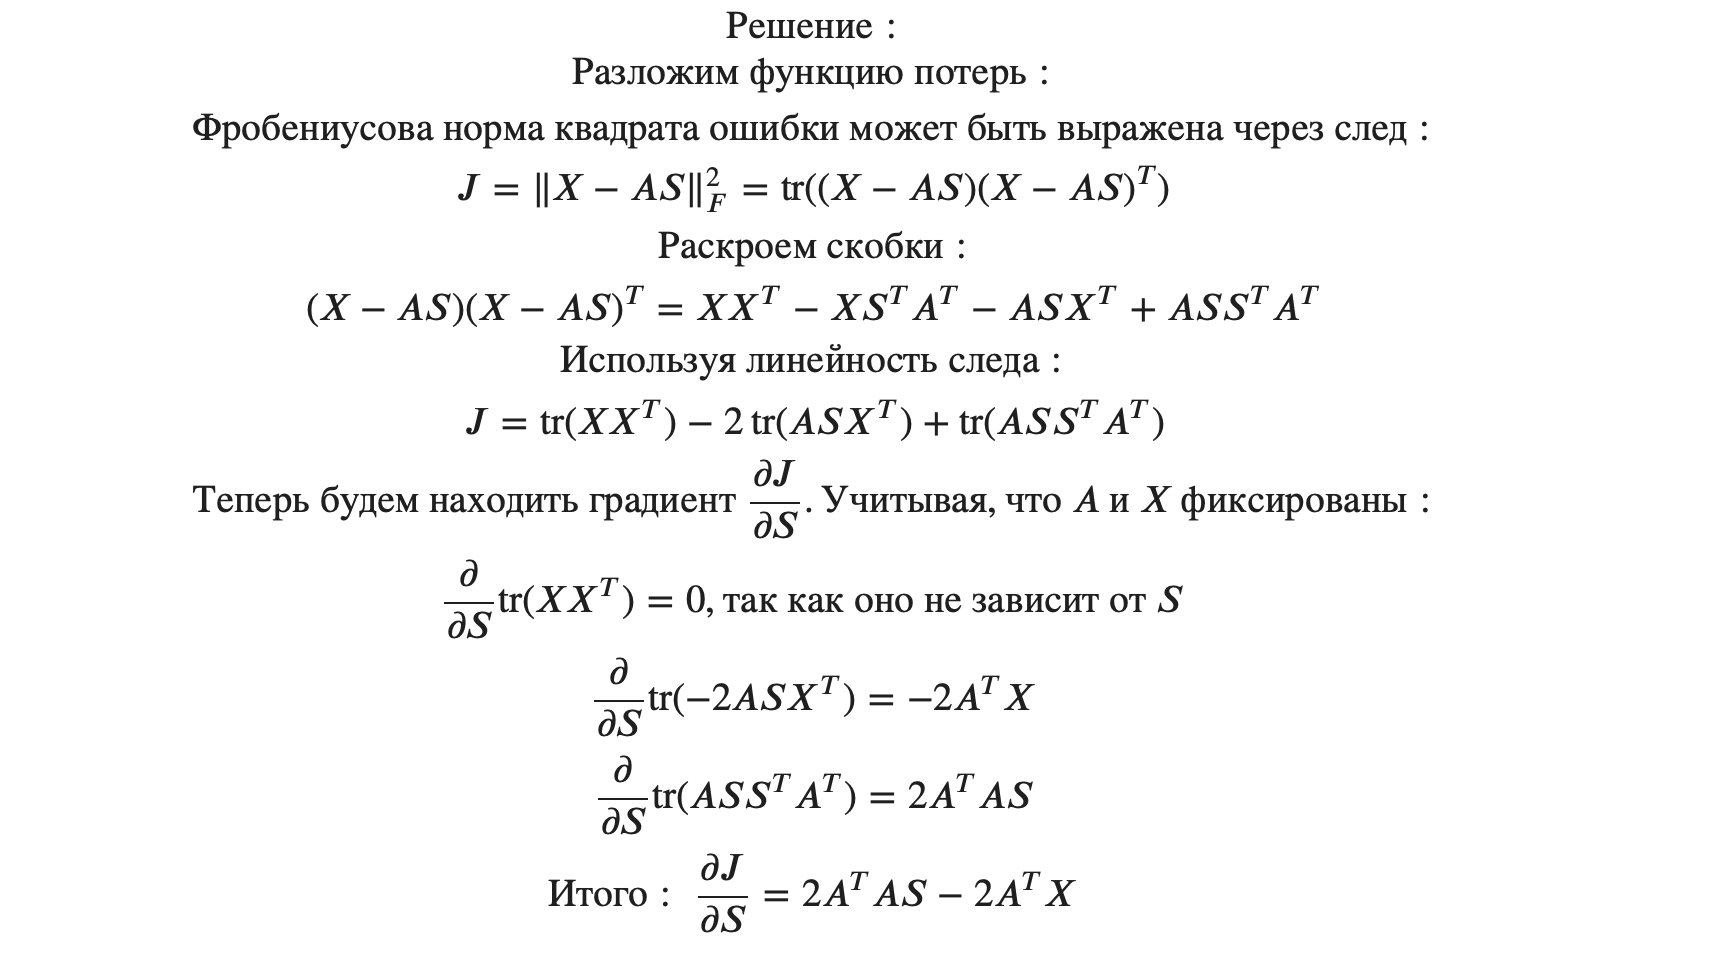

In [2]:
import numpy as np

# Задаем матрицу X (N x M), матрицу A (N x R) и матрицу S (R x M)
X = np.array([[5, 6], [7, 8]])  # Пример матрицы X (2x2)
A = np.array([[1, 2], [3, 4]])  # Пример матрицы A (2x2)
S = np.array([[1, 0], [0, 1]])  # Пример матрицы S (2x2)

# Вычисляем градиент J по S: dJ/dS = 2 * (A^T A S - A^T X)
AtA = np.dot(A.T, A)        # A^T A
AtX = np.dot(A.T, X)        # A^T X
grad_S = 2 * (np.dot(AtA, S) - AtX)  # Градиент

# Выводим результат
print("Градиент dJ/dS:")
print(grad_S)


Градиент dJ/dS:
[[-32 -32]
 [-48 -48]]


## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*

Яркие строки — это тестовые цифры, такие что в обучающем наборе есть мало похожих на них цифр.

Яркие столбцы — это цифры из обучающего набора, у которых нет похожих цифр в тестовом наборе




### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$,

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:*

1 и 3

*Your Explanation:*

1- L1-расстояние инвариантно к глобальному сдвигу, то есть относительные расстояния между образцами не изменяются

3- выполнение стандартизации не изменяет относительные расстояния между образцами, поскольку она изменяет все пиксели одинаково по всему набору данных.



## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:*

1. Ложь, так как граница может иметь сложную форму
2. Правда, та как каждый пример - свой собственный сосед
3. Ложь
4. Правда. Для классификация нового примера необходимо вычисление расстояния до всех остальных примеров
5. Ложь

